# TOC:
* ## [Naive Bayes Classification](#naive)
* ## [Conditional Random Fields 1](#crf1): pycrfsuite
* ## [Conditional Random Fields 2](#crf2): sklearn_crfsuite
* ## [Conditional Random Fields 3](#crf3): looking for better c1,c2


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import os

documents = []
for doc in os.listdir("training_data"):
    if doc.endswith("ing.csv"):
        documents.append(pd.read_csv("training_data/"+doc))

all_vectors = pd.concat(documents)
len(documents), len(all_vectors)

#Last (81, 110525) : 81 docs :/
#Current (125, 174927)

(125, 174927)

In [3]:
# Place features in X and types in Y

def get_features(vectors):
    return vectors.drop('type', axis=1)

def get_types(vectors):
    return vectors['type']

def pd_to_dict_list(data):
    return data.to_dict('records')
    #return data.values.tolist()

def pd_type_column_to_string_list(data):
     return [ x for x in data ]
    
X_pd = get_features(all_vectors)
y_pd = get_types(all_vectors)

X_doc_list = [ pd_to_dict_list(get_features(doc)) for doc in documents ]
y_doc_list = [ pd_type_column_to_string_list(get_types(doc)) for doc in documents ]

X_doc_list[0][52], y_doc_list[0][52]

({'awerage_word_length': 1.0,
  'boldness_first_word': 0.0,
  'formuleness': 0.0,
  'heading_first_word': False,
  'is_capital_first_letter': False,
  'italicness': 0.0,
  'proof_first_word': False,
  'words_num': 1},
 'text')

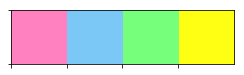

In [3]:
# Plot palette
col_list = ["pink", "lightblue", "lightgreen", "yellow"]
sns.palplot(sns.xkcd_palette(col_list))

In [ ]:
# Plot
col_list_palette = sns.xkcd_palette(col_list)
sns.set_palette(col_list_palette)
sns.set_context("paper", rc={"axes.labelsize":45})
plot=sns.pairplot(
    data=all_vectors, hue="type",
    plot_kws = {'alpha': 0.3, 'edgecolor': 'k'},
    markers = ["+", "o", "s", "D"],
    height=10)
plot._legend.get_title().set_fontsize(45)
plot

In [ ]:
# Save plot
plot.savefig("plots/lines_plot_28.png")

<a id='naive'></a>
# Naive Bayes Classification


In [55]:
# Separating data to training and test for all_vectors
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pd, y_pd, test_size=0.3)

# Trying Naive Bayes Classification on lines
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(X_train, y_train)                  # 3. fit model to data
y_model = model.predict(X_test)             # 4. predict on new data
y_model_train = model.predict(X_train)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#print "Test data"
#print classification_report(y_test, y_model, digits=2)
print "Training data"
print classification_report(y_train, y_model_train, digits=2)

Training data
             precision    recall  f1-score   support

 after_body       0.39      0.17      0.24      3149
       body       0.41      0.46      0.43      8028
    heading       0.55      0.89      0.68      2132
       text       0.94      0.94      0.94    109139

avg / total       0.89      0.88      0.88    122448



<a id='crf1'></a>
# Conditional Random Fields 1

In [53]:
# Conditional Random Fields 1.1

# Separating data to training and test for documents
X_train, X_test, y_train, y_test = train_test_split(X_doc_list, y_doc_list, test_size=0.3)

import pycrfsuite
trainer = pycrfsuite.Trainer(verbose=True)

#TODO: debug!!!

# Submit training data to the trainer
for xseq, yseq in zip(X_train, y_train):
    trainer.append(xseq, yseq)

# Set the parameters of the model
trainer.set_params({
    # coefficient for L1 penalty
    'c1' : 0.189,
    'c2' : 0.017,

    # maximum number of iterations
    'max_iterations': 100,

    # whether to include transitions that
    # are possible, but not observed
    'feature.possible_transitions': True
})

# Save the model to the file
trainer.train('crf_models/crf.model')

Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 48
Seconds required: 0.038

L-BFGS optimization
c1: 0.189000
c2: 0.017000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

***** Iteration #1 *****
Loss: 115420.194776
Feature norm: 0.500000
Error norm: 129698.155966
Active features: 48
Line search trials: 2
Line search step: 0.000001
Seconds required for this iteration: 0.166

***** Iteration #2 *****
Loss: 106455.503791
Feature norm: 0.443880
Error norm: 122005.735163
Active features: 44
Line search trials: 1
Line search step: 1.000000
Seconds required for this iteration: 0.061

***** Iteration #3 *****
Loss: 58969.669796
Feature norm: 0.854260
Error norm: 49555.222972
Active features: 36
Line search trials: 1
Line search step: 1.000000
Seconds required for this it

***** Iteration #41 *****
Loss: 16577.114017
Feature norm: 10.433812
Error norm: 10263.252193
Active features: 47
Line search trials: 1
Line search step: 1.000000
Seconds required for this iteration: 0.064

***** Iteration #42 *****
Loss: 16369.088389
Feature norm: 10.102384
Error norm: 10314.120927
Active features: 47
Line search trials: 1
Line search step: 1.000000
Seconds required for this iteration: 0.067

***** Iteration #43 *****
Loss: 16144.771430
Feature norm: 10.467616
Error norm: 8513.566468
Active features: 47
Line search trials: 1
Line search step: 1.000000
Seconds required for this iteration: 0.065

***** Iteration #44 *****
Loss: 16082.220790
Feature norm: 10.618070
Error norm: 17030.792616
Active features: 48
Line search trials: 1
Line search step: 1.000000
Seconds required for this iteration: 0.064

***** Iteration #45 *****
Loss: 16013.538502
Feature norm: 10.879157
Error norm: 4923.171160
Active features: 47
Line search trials: 1
Line search step: 1.000000
Seconds req

***** Iteration #83 *****
Loss: 15322.891263
Feature norm: 13.477263
Error norm: 3856.596551
Active features: 48
Line search trials: 1
Line search step: 1.000000
Seconds required for this iteration: 0.058

***** Iteration #84 *****
Loss: 15318.630436
Feature norm: 13.538567
Error norm: 5256.825187
Active features: 48
Line search trials: 1
Line search step: 1.000000
Seconds required for this iteration: 0.060

***** Iteration #85 *****
Loss: 15314.977946
Feature norm: 13.612082
Error norm: 4512.248922
Active features: 48
Line search trials: 1
Line search step: 1.000000
Seconds required for this iteration: 0.066

***** Iteration #86 *****
Loss: 15311.223057
Feature norm: 13.669532
Error norm: 3692.921078
Active features: 48
Line search trials: 1
Line search step: 1.000000
Seconds required for this iteration: 0.061

***** Iteration #87 *****
Loss: 15308.055393
Feature norm: 13.719809
Error norm: 2435.996483
Active features: 48
Line search trials: 1
Line search step: 1.000000
Seconds requir

In [54]:
# Conditional Random Fields 1.2
tagger = pycrfsuite.Tagger()
tagger.open('crf_models/crf.model')
y_pred = [tagger.tag(xseq) for xseq in X_test]

# Create a mapping of labels to indices
labels = {"heading": 0, "body": 1, "after_body": 2, "text": 3}

import numpy as np
from sklearn.metrics import classification_report

# Convert the sequences of tags into a 1-dimensional array
predictions = np.array([labels[tag] for row in y_pred for tag in row])
truths = np.array([labels[tag] for row in y_test for tag in row])

# Print out the classification report
print(classification_report(
    truths, predictions, target_names=["heading", "body", "after_body", "text"]))

             precision    recall  f1-score   support

    heading       0.86      0.68      0.76       966
       body       0.71      0.41      0.52      3643
 after_body       0.53      0.28      0.37      1344
       text       0.94      0.99      0.96     46413

avg / total       0.91      0.92      0.91     52366



<a id='crf2'></a>
# Conditional Random Fields 2

In [51]:
#Conditional Random Fields 2.1
import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats

#TODO: debug!!!

# Separating data to training and test
X_train, X_test, y_train, y_test = train_test_split(X_doc_list, y_doc_list, test_size=0.3)

# Set the parameters of the model
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
        
    c1 = 0.189,
    c2 = 0.017,
    
    max_iterations=100,
    
    # whether to include transitions that
    # are possible, but not observed
    all_possible_transitions=True
)

crf.fit(X_train, y_train)
y_pred_train = crf.predict(X_train)
y_pred_test = crf.predict(X_test)

print("Training on the training part")
print(metrics.flat_classification_report(y_train, y_pred_train, digits=2))
# print("Training on the test part")
# print(metrics.flat_classification_report(y_test, y_pred_test, digits=2))

Training on the training part
             precision    recall  f1-score   support

 after_body       0.53      0.28      0.37      3007
       body       0.73      0.41      0.52      7850
    heading       0.87      0.68      0.76      2120
       text       0.94      0.99      0.96     96677

avg / total       0.91      0.92      0.91    109654



In [28]:
# Conditional Random Fields 2.2
# Dependencies

from collections import Counter

def print_state_features(state_features):
    for (attr, label), weight in state_features:
        print("%0.6f %-8s %s" % (weight, label, attr))

print("Top positive:")
print_state_features(Counter(crf.state_features_).most_common(30))

print("\nTop negative:")
print_state_features(Counter(crf.state_features_).most_common()[-30:])


Top positive:
4.272583 heading  boldness_first_word
1.927818 after_body proof_first_word
1.191632 heading  is_capital_first_letter
0.602542 body     italicness
0.529045 after_body is_capital_first_letter
0.521913 body     formuleness
0.497528 text     proof_first_word
0.343626 heading  italicness
0.311642 after_body heading_first_word
0.308103 heading  heading_first_word
0.296745 text     formuleness
0.113994 body     awerage_word_length
0.112653 text     awerage_word_length
0.048858 after_body formuleness
0.045097 after_body awerage_word_length
0.034900 after_body italicness
0.007286 heading  words_num
-0.020974 body     words_num
-0.022003 after_body boldness_first_word
-0.054758 text     words_num
-0.055371 after_body words_num
-0.065767 text     is_capital_first_letter
-0.177573 body     heading_first_word
-0.274664 heading  awerage_word_length
-0.282550 text     boldness_first_word
-0.490555 body     is_capital_first_letter
-0.849643 text     heading_first_word
-1.069225 body     

In [30]:
# Conditional Random Fields 2.4
# Transitions

def print_transitions(trans_features):
    for (label_from, label_to), weight in trans_features:
        print("%-6s -> %-7s %0.6f" % (label_from, label_to, weight))

print("Top likely transitions:")
print_transitions(Counter(crf.transition_features_).most_common(20))

print("\nTop unlikely transitions:")
print_transitions(Counter(crf.transition_features_).most_common()[-20:])

Top likely transitions:
text   -> text    1.834382
body   -> after_body 1.070380
body   -> body    0.820244
after_body -> text    0.035666
heading -> body    -0.024225
text   -> heading -0.819058
text   -> body    -1.135954
heading -> after_body -1.480882
body   -> heading -1.905164
after_body -> body    -2.245642
after_body -> heading -2.246733
heading -> text    -2.598201
after_body -> after_body -3.146060
heading -> heading -3.323927
text   -> after_body -5.128305
body   -> text    -6.346715

Top unlikely transitions:
text   -> text    1.834382
body   -> after_body 1.070380
body   -> body    0.820244
after_body -> text    0.035666
heading -> body    -0.024225
text   -> heading -0.819058
text   -> body    -1.135954
heading -> after_body -1.480882
body   -> heading -1.905164
after_body -> body    -2.245642
after_body -> heading -2.246733
heading -> text    -2.598201
after_body -> after_body -3.146060
heading -> heading -3.323927
text   -> after_body -5.128305
body   -> text    -6.3467

/usr/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/usr/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/usr/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Dark blue => 0.5055, dark red => 0.5108


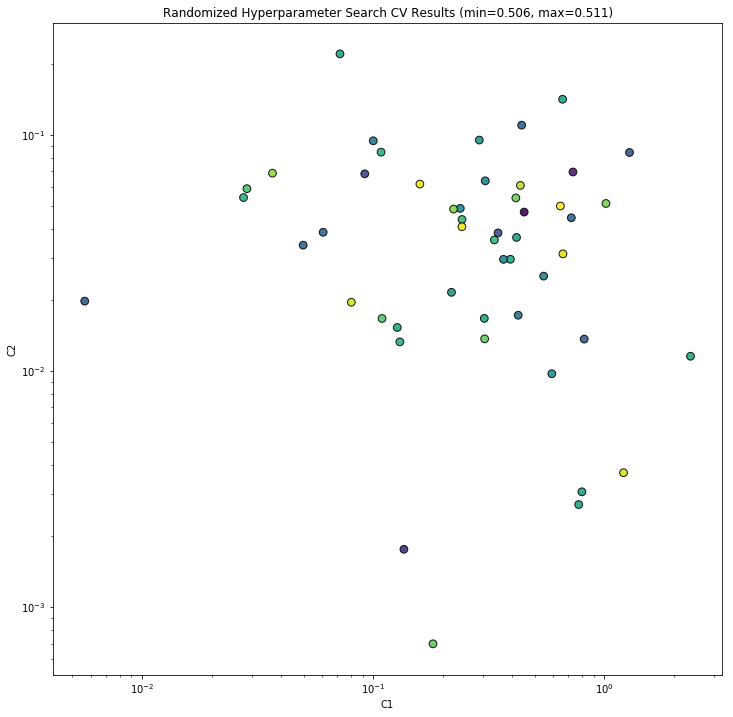

In [29]:
# Conditional Random Fields 2.3
# Dependencies

import matplotlib.pyplot as plt

_x = [s.parameters['c1'] for s in rs.grid_scores_]
_y = [s.parameters['c2'] for s in rs.grid_scores_]
_c = [s.mean_validation_score for s in rs.grid_scores_]

fig = plt.figure()
fig.set_size_inches(12, 12)
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('C1')
ax.set_ylabel('C2')
ax.set_title("Randomized Hyperparameter Search CV Results (min={:0.3}, max={:0.3})".format(
    min(_c), max(_c)
))

ax.scatter(_x, _y, c=_c, s=60, alpha=0.9, edgecolors=[0,0,0])

print("Dark blue => {:0.4}, dark red => {:0.4}".format(min(_c), max(_c)))

<a id='crf3'></a>
# Conditional Random Fields 3

In [46]:
# Conditional Random Fields 3.1
# Adjusting c1, c2 to take care of "heading", "body", and "after_body" rather than "text"

# Takes time, +-4min

params_space = {
    'c1': scipy.stats.expon(scale=0.5),
    'c2': scipy.stats.expon(scale=0.05),
}

labels = ['heading', 'body', 'after_body']

# use the same metric for evaluation
f1_scorer = make_scorer(metrics.flat_f1_score,
                        average='weighted', labels=labels)

# search
rs = RandomizedSearchCV(crf, params_space,
                        cv=3,
                        verbose=1,
                        n_jobs=-1,
                        n_iter=20,
                        scoring=f1_scorer)

rs.fit(X_train, y_train)

#something goes wrong


Fitting 3 folds for each of 20 candidates, totalling 60 fits


Process PoolWorker-12:
Process PoolWorker-11:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
    self.run()
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python2.7/multiprocessing/pool.py", line 102, in worker
  File "/usr/lib/python2.7/multiprocessing/pool.py", line 102, in worker
    task = get()
    task = get()
  File "/usr/lib/python2.7/dist-packages/joblib/pool.py", line 362, in get
  File "/usr/lib/python2.7/dist-packages/joblib/pool.py", line 360, in get
    racquire()
    return recv()
KeyboardInterrupt
KeyboardInterrupt
Process PoolWorker-10:
Traceback (most recent call last):

KeyboardInterrupt: 

  File "/usr/lib/python2.7/dist-packages/joblib/pool.py", line 360, in get
    racquire()
    racquire()
KeyboardInterrupt
KeyboardInterrupt


In [49]:
# Conditional Random Fields 3.2
# Check up c1, c2 and build a crf

#previous: 0.18, 0.017
#last: {'c1': 0.28900203043076822, 'c2': 0.015259555421089956}
print rs.best_params_

crf=rs.best_estimator_

crf.fit(X_train, y_train)
y_pred_train = crf.predict(X_train)
y_pred_test = crf.predict(X_test)

print(metrics.flat_classification_report(y_train, y_pred_train, digits=2))

#rs.best_score_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'